In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
import statsmodels.api as sm

In [3]:
path = r'/Users/gulgulusingh/Documents/MLOPS/Dataset/economic_index.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


# Data Preprocessing

In [5]:
#Drop the unnecessary columns like month and year 
df.drop(columns=['Unnamed: 0', 'year' , 'month'], inplace=True ,axis=1)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df.isnull().sum() # to check the null values

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


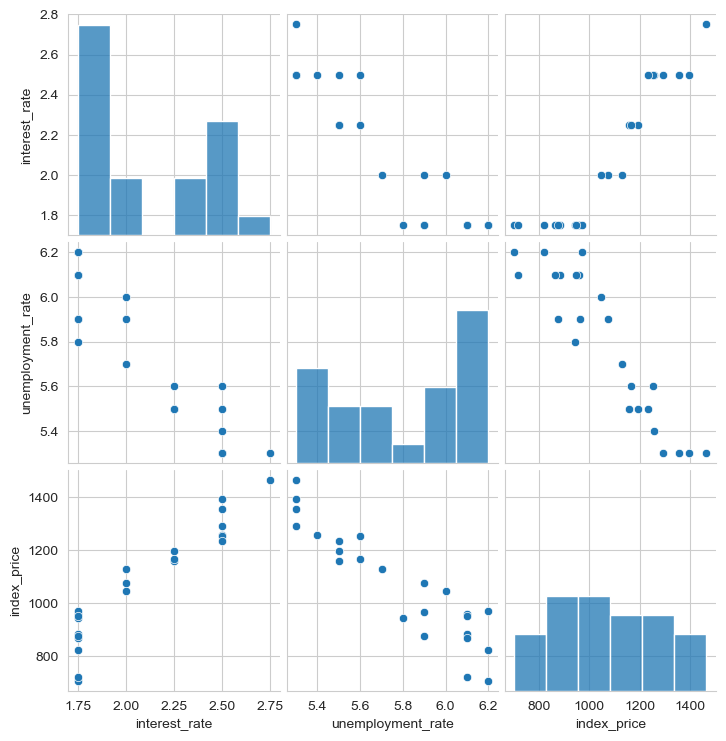

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [10]:
# independent and dependent features
X = df.iloc[: , :-1] # X = df[['interest_rate' , 'unemployment_rate']]
Y = df.iloc[: , -1] # Y = df['index_price']

In [11]:
X.shape

(24, 2)

In [12]:
Y.shape

(24,)

Train and Test dataset Split 

In [13]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.25 , random_state=42)

In [14]:
X_train.shape

(18, 2)

Absolutely! Let's talk about `sns.regplot()`.

**Seaborn's regplot() Function**

`sns.regplot()` is a versatile plotting function in the Seaborn data visualization library (built on top of Matplotlib). It is designed to help you visualize the relationship between two variables while also fitting and plotting a regression line.

**Key Features**

* **Scatterplot:**  The core of `regplot()` is a scatterplot where each point represents an observation with its x and y values.
* **Regression Line:** The function automatically calculates and plots a linear regression line that best fits the data points. This line gives you a visual representation of the trend and strength of the relationship.
* **Confidence Interval:** Optionally, you can add a shaded region around the regression line to represent a confidence interval. This gives you an idea of the uncertainty associated with the estimated regression line.
* **Customizable:** `regplot()` offers a wide range of customization options, allowing you to control the appearance of the plot, including colors, markers, line styles, and more.
* **Flexibility:** You can use `regplot()` for simple linear regression as well as higher-order polynomial regression, logistic regression, and locally weighted scatterplot smoothing (LOWESS).

**Example Usage**

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your own)
x = [1, 2, 3, 4, 5]
y = [3, 5, 6, 8, 10]

# Create the regression plot
sns.regplot(x=x, y=y)

# Show the plot
plt.show()
```

This will produce a scatterplot with a linear regression line overlaid.

**Additional Options**

Here are some useful parameters you can use with `regplot()`:

* `order`: Fit a polynomial regression model (e.g., `order=2` for quadratic regression).
* `ci`:  Set the confidence interval level (e.g., `ci=95` for a 95% confidence interval).
* `marker`: Change the marker style for the scatterplot points.
* `scatter_kws`: Pass a dictionary of keyword arguments to customize the scatterplot.
* `line_kws`: Pass a dictionary of keyword arguments to customize the regression line.

**Why Use regplot()?**

* **Quick Visualization:** It provides a fast way to visualize the relationship between two variables and assess the fit of a regression model.
* **Easy Interpretation:** The regression line and confidence interval offer a clear visual summary of the trend and uncertainty in the data.
* **Built-in Regression:** You don't need to separately calculate and plot the regression line; it's all done for you.

Let me know if you'd like more examples or want to explore specific customizations of `regplot()`!


<Axes: xlabel='interest_rate', ylabel='index_price'>

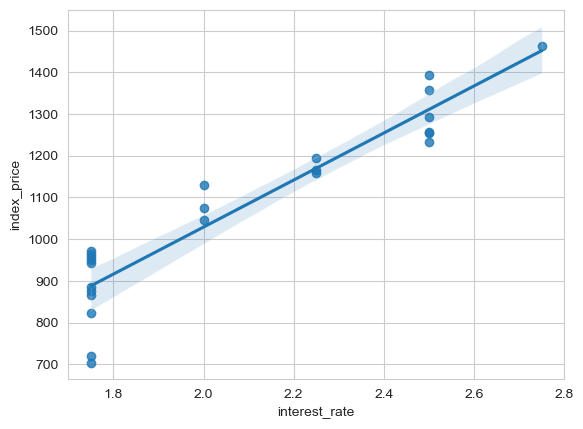

In [15]:
sns.regplot(data=df, x='interest_rate', y='index_price')


<Axes: xlabel='unemployment_rate', ylabel='index_price'>

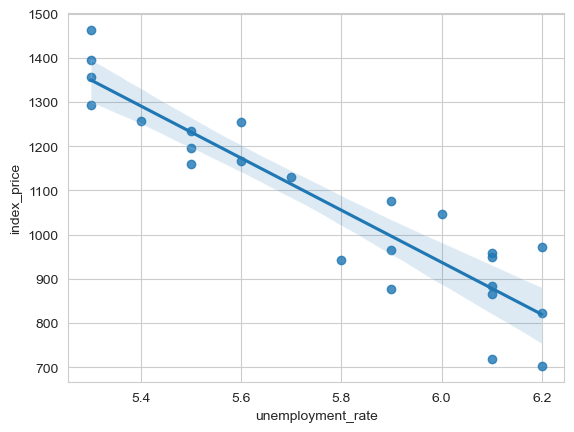

In [16]:
sns.regplot(data=df , x='unemployment_rate', y='index_price')

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
regression = LinearRegression()
regression.fit(X_train , Y_train)

LinearRegression()

# Cross_Validation using cross_val_score

Absolutely! Let's dive into cross-validation using `cross_val_score` in scikit-learn.

**What is Cross-Validation?**

Cross-validation is a resampling procedure used to evaluate machine learning models and assess how well they generalize to new, unseen data. It helps to avoid overfitting (where a model performs well on training data but poorly on new data). 

The basic idea is to split your dataset into multiple subsets (folds), train the model on some folds, and then evaluate its performance on the remaining fold(s). This process is repeated multiple times, with different folds used for training and testing in each iteration.

**`cross_val_score` in scikit-learn**

The `cross_val_score` function in scikit-learn simplifies the process of performing cross-validation. It takes your model, your data, and a cross-validation strategy, and returns an array of scores calculated on the different folds.

**How to Use `cross_val_score`**

1. **Import Necessary Libraries:**
   ```python
   from sklearn.model_selection import cross_val_score
   from sklearn.linear_model import LinearRegression # Or any other model
   ```

2. **Prepare Your Data:**
   Make sure your data is split into features (`X`) and target variable (`y`).

3. **Instantiate Your Model:**
   ```python
   model = LinearRegression()
   ```

4. **Choose a Cross-Validation Strategy:**
   * `cv=5`: 5-fold cross-validation (the default)
   * `cv=10`: 10-fold cross-validation
   * `cv=KFold(n_splits=5, shuffle=True, random_state=0)`: More control over folding
   * Other options like `StratifiedKFold` for imbalanced data

5. **Call `cross_val_score`:**
   ```python
   scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error') # Or other scoring metric
   ```
   * The `scoring` parameter lets you choose the metric to evaluate (e.g., accuracy, mean squared error).

6. **Analyze the Scores:**
   ```python
   print("Cross-Validation Scores:", -scores) # Negate for MSE since it's negative in scikit-learn
   print("Average Score:", -scores.mean())
   print("Standard Deviation:", scores.std())
   ```

**Complete Example**

```python
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load Data
boston = load_boston()
X, y = boston.data, boston.target

# Create Model
model = LinearRegression()

# Define Cross-Validation Strategy
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Evaluate Model
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Report Results
print("Cross-Validation Scores:", -scores)
print("Average MSE:", -scores.mean())
print("Standard Deviation:", scores.std())
```

**Key Benefits of Cross-Validation**

* **Robustness:**  Reduces the risk of overfitting and gives a more reliable estimate of how your model will perform on unseen data.
* **Better Model Selection:** Helps you compare different models and choose the one that generalizes best.
* **Hyperparameter Tuning:** Can be used with grid search or random search to find the best hyperparameters for your model.

Let me know if you'd like to explore more advanced cross-validation techniques or have any specific scenarios you'd like to discuss!

# Cross validation Strategies used in Sklearn cross-validation-algorithm

In `cross_val_score`, the cross-validation strategy determines how your dataset is split into folds for training and testing during the cross-validation process. Scikit-learn provides a variety of built-in strategies as well as the flexibility to define your own custom strategy.

**Built-in Cross-Validation Strategies**

* **K-Folds (`KFold`)**: Divides the data into `k` folds. In each iteration, one fold is used for testing, and the remaining `k-1` folds are used for training. This is the default strategy when you pass an integer value to the `cv` parameter (e.g., `cv=5`).

* **Stratified K-Folds (`StratifiedKFold`)**: Similar to K-Folds, but ensures that the distribution of classes (for classification problems) is approximately equal in each fold. Useful for imbalanced datasets.

* **Leave One Out (`LeaveOneOut`)**:  Each sample is used as a test set once, while the remaining samples are used for training. This is computationally expensive but can be useful for small datasets.

* **Shuffle Split (`ShuffleSplit`)**: Generates random splits for training and testing.  You control the number of splits and the proportion of data in each split.

* **Group K-Fold (`GroupKFold`)**:  Useful when you have groups of samples that should not be split across folds (e.g., data from multiple patients).

**Custom Cross-Validation Strategies**

You can define your own cross-validation strategy by creating an iterable that yields (train, test) splits as arrays of indices.  

**Example: Custom Time Series Split**

```python
from sklearn.model_selection import TimeSeriesSplit

# 5 splits with increasing training set size
tscv = TimeSeriesSplit(n_splits=5) 
```

**Choosing the Right Strategy**

The best cross-validation strategy depends on your specific problem and dataset:

* **K-Folds:** A good default choice for many problems.
* **Stratified K-Folds:** Preferable for classification problems with imbalanced classes.
* **Leave One Out:** For small datasets where you want to maximize the amount of data used for training.
* **Shuffle Split:** Useful for exploring the variability of your model's performance.
* **Group K-Fold:** Essential when you have groups of related samples.
* **Custom:** If none of the built-in strategies fit your needs, create your own!

**Using the `cv` Parameter in `cross_val_score`**

You can pass any of the following to the `cv` parameter:

* **Integer:** Specifies the number of folds for K-Folds cross-validation.
* **Cross-Validation Iterator Object:**  An instance of one of the built-in cross-validation classes (`KFold`, `StratifiedKFold`, etc.).
* **Custom Iterable:** Your own iterable that yields (train, test) splits.

**Example Usage**

```python
from sklearn.model_selection import cross_val_score, KFold
# ... (your data and model setup)

# K-Fold cross-validation with 5 folds
scores_kfold = cross_val_score(model, X, y, cv=5)

# Stratified K-Fold
from sklearn.model_selection import StratifiedKFold
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores_stratified = cross_val_score(model, X, y, cv=cv_stratified)
```

Let me know if you have any other questions or would like a more tailored example!

You should consider using `Stratified K-Fold` cross-validation in the following scenarios:

1. **Classification Problems with Imbalanced Classes:**

   * When your target variable has a skewed class distribution (e.g., 90% of samples belong to one class, and 10% to another), regular K-Fold might result in folds where the minority class is underrepresented or even absent. This can lead to misleading performance estimates.
   * Stratified K-Fold ensures that each fold maintains the same proportion of samples from each class as the original dataset, providing a more accurate representation of your model's performance on all classes.

2. **Small Datasets:**

   * When your dataset is relatively small, the randomness of regular K-Fold might lead to significant variations in the performance across different folds.
   * Stratified K-Fold helps to mitigate this by providing more consistent folds, reducing the variance of your performance estimates.

3. **Multi-Label Classification:**

   * In multi-label classification, each sample can belong to multiple classes simultaneously. 
   * Stratified K-Fold can be extended (using techniques like iterative stratification) to ensure that the distribution of labels is preserved across folds, which is crucial for accurate evaluation.

4. **Any Situation Where Class Distribution Matters:**

   * Even if your class distribution isn't severely imbalanced, if you suspect that the class distribution might affect your model's performance, Stratified K-Fold is a safer choice. It helps you avoid potential biases in your evaluation due to the class distribution.

**When Not to Use Stratified K-Fold**

* **Regression Problems:** Stratified K-Fold is designed for classification problems.  For regression problems, where the target variable is continuous, regular K-Fold is usually sufficient.
* **Large, Balanced Datasets:** If your dataset is very large and the classes are already well-balanced, the benefits of Stratified K-Fold might not be significant, and regular K-Fold can be used for simplicity.

**Key Points**

* Stratified K-Fold is a more robust cross-validation strategy than regular K-Fold in many scenarios, especially when dealing with imbalanced classes or small datasets.
* It ensures that each fold accurately represents the overall class distribution of the original dataset.
* When in doubt, using Stratified K-Fold is often a safe bet, as it can help you avoid potential biases in your model evaluation.

Let me know if you have any other questions!


# When and how should these cross-validation-algorithm be used ?

Absolutely! Let's break down when to use each cross-validation strategy:

**K-Fold Cross-Validation**

* **Use Case:** General purpose cross-validation for regression and balanced classification problems.
* **Strengths:**
    * Simple to understand and implement.
    * Provides a robust estimate of model performance.
    * Computationally efficient.
* **Weaknesses:**
    * May not be ideal for imbalanced datasets, as some folds could end up with a disproportionate number of samples from a particular class.

**Stratified K-Fold Cross-Validation**

* **Use Case:** Classification problems with imbalanced classes, or situations where preserving the class distribution in each fold is crucial.
* **Strengths:**
    * Ensures each fold maintains the same class distribution as the original dataset.
    * Reduces the risk of misleading performance estimates caused by imbalanced folds.
    * Especially useful for smaller datasets where the class imbalance can have a greater impact.
* **Weaknesses:**
    * Slightly more complex to implement than regular K-Fold.

**Leave-One-Out Cross-Validation (LOOCV)**

* **Use Case:** Small datasets where you want to maximize the amount of data used for training.
* **Strengths:**
    * Uses almost all of the data for training in each iteration, potentially leading to a more accurate estimate of model performance.
* **Weaknesses:**
    * Computationally expensive, especially for large datasets.
    * High variance in results due to the small size of the test set in each iteration.

**Shuffle Split Cross-Validation**

* **Use Case:** Exploring the variability of model performance or when you need a specific number of train-test splits.
* **Strengths:**
    * Flexible: allows you to control the number of splits and the proportion of data in each split.
    * Can be useful for repeated cross-validation to get a more robust estimate of performance.
* **Weaknesses:**
    * Does not guarantee the same distribution of samples across splits, which might be problematic for imbalanced datasets.

**Group K-Fold Cross-Validation**

* **Use Case:** Datasets with groups of related samples that should not be split across folds (e.g., data from multiple patients).
* **Strengths:**
    * Prevents data leakage between training and test sets when samples have inherent dependencies.
* **Weaknesses:**
    * Requires knowledge of group membership for each sample.


**Choosing the Right Strategy**

The choice of cross-validation strategy depends on your specific problem, dataset, and goals:

* **Start with K-Fold:** A good default for most cases.
* **If you have class imbalance:** Switch to Stratified K-Fold.
* **If you have a small dataset:** Consider LOOCV or Shuffle Split.
* **If your samples have groups:** Use Group K-Fold.

**Additional Tips**

* **Nested Cross-Validation:** If you need to tune hyperparameters and evaluate your model's final performance, use nested cross-validation.
* **Repeated Cross-Validation:** Repeating the cross-validation process with different random seeds can help reduce the variability of your results.
* **Experiment:**  Don't be afraid to try different strategies and see which one works best for your specific problem.

Let me know if you have any other questions!


In [19]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)

In [20]:
scores = cross_val_score(regression , X_train ,Y_train , cv=cv , scoring='neg_mean_squared_error')

In [21]:
print("Cross-Validation Scores:", scores) # Negate for MSE since it's negative in scikit-learn
print("Average Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [ -8694.04480295  -1559.44382066  -7046.85013068  -2016.77483272
 -11293.18428733]
Average Score: -6122.059574870723
Standard Deviation: 3791.6144770284864


In [50]:
#prediction
y_predicted = regression.predict(X_test)

In [60]:
mse = mean_squared_error(Y_test, y_predicted)
mae = mean_absolute_error(Y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(Y_test, y_predicted))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
score = r2_score(Y_test, y_predicted)
print("r^2 score:", score*100 , "% Accuracy:")

Mean Squared Error: 5793.76288771258
Mean Absolute Error: 59.93578152323554
Root Mean Squared Error: 76.11677139574813
r^2 score: 82.78978091457142 % Accuracy:


In [59]:
Adjusted_r2 = 1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2 Score : " , Adjusted_r2*100 , "% Accuracy")


Adjusted R2 Score :  71.31630152428569 % Accuracy


# Assumption

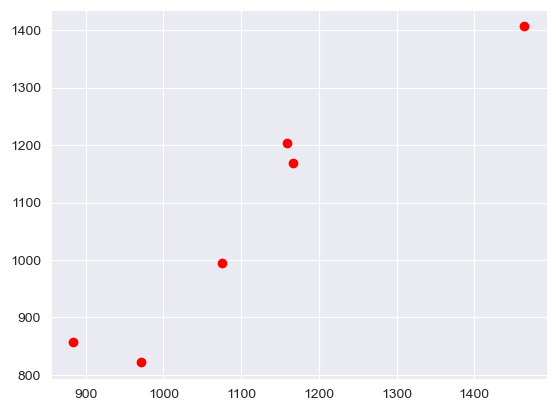

In [61]:
plt.scatter(Y_test , y_predicted , color='red') # linear hence you model has performed well

In [62]:
residuals = Y_test - y_predicted
print("Residuals:", residuals)

Residuals: 8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


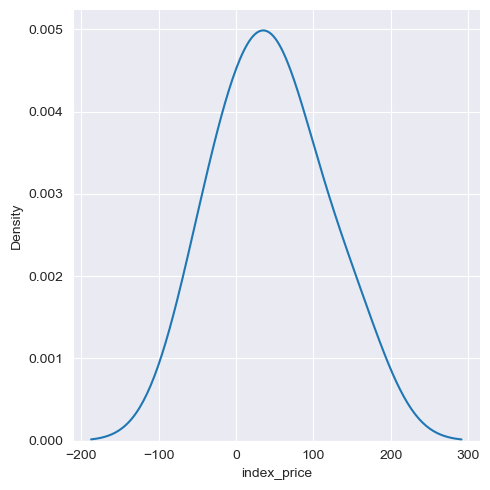

In [63]:
##Plot this residuals
sns.displot(residuals, kind='kde')

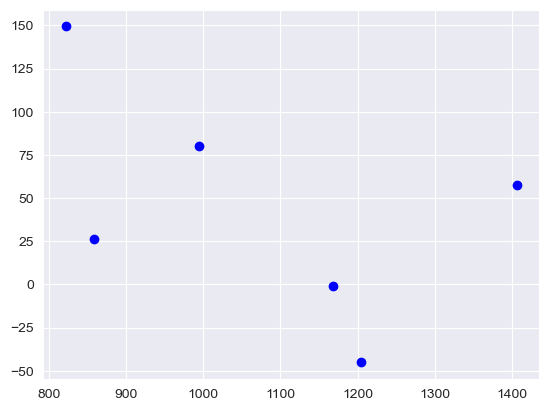

In [64]:
# scatter plot with predictions  and residuals
plt.scatter(y_predicted , residuals , color='blue')

# Validating with OLS

In [66]:
model = sm.OLS(Y_train , X_train ).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 12 Jun 2024   Prob (F-statistic):                       0.754
Time:                        19:59:13   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [67]:
print(regression.coef_)

[  88.27275507 -116.25716066]
